<a href="https://colab.research.google.com/github/ErycaFMS/introduction-to-data-science/blob/main/08_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introdução:** Algoritmo SVM  métricas de avaliação de algoritmos de classificação binária.

Passo 1: Criação do Conjunto de Dados Sintéticos

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.decomposition import PCA


# Criando dados sintéticos para classificação binária
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)


2. Salvando os Dados Antes e Depois da Padronização

In [21]:
# Salvando os dados antes da padronização
data_before = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
data_before['Target'] = y
data_before.to_csv('data_before_standardization.csv', index=False)

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Salvando os dados após a padronização
data_after = pd.DataFrame(X_scaled, columns=[f'Feature_{i}' for i in range(X_scaled.shape[1])])
data_after['Target'] = y
data_after.to_csv('data_after_standardization.csv', index=False)


Passo 3: Divisão dos Dados em Conjuntos de Treino e Teste

In [22]:
# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Passo 4: Treinamento do algoritmo SVM

In [23]:
# Treinando o modelo SVM com diferentes kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}

for kernel in kernels:
    model = SVC(kernel=kernel, probability=True, random_state=42)
    model.fit(X_train, y_train)
    models[kernel] = model


Passo 5: Otimização de parâmetros e Kernel

In [24]:
# Exemplo de otimização de parâmetros (C e gamma) para o kernel RBF
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(kernel='rbf', probability=True, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


Passo 6: Avaliação das metricas

Kernel: linear
Matriz de Confusão:


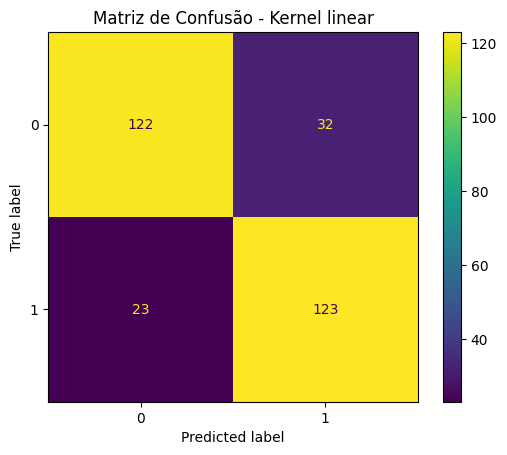


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       154
           1       0.79      0.84      0.82       146

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



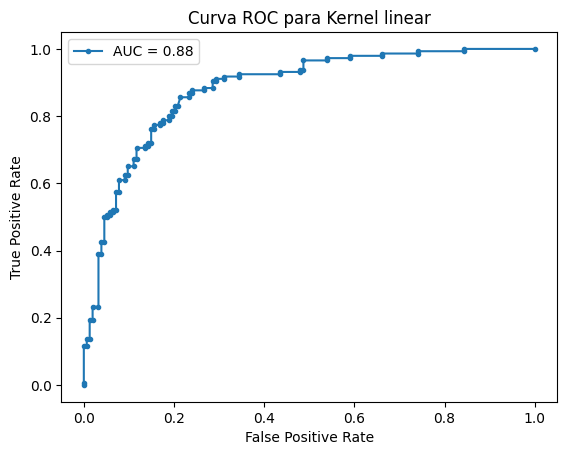

Kernel: poly
Matriz de Confusão:


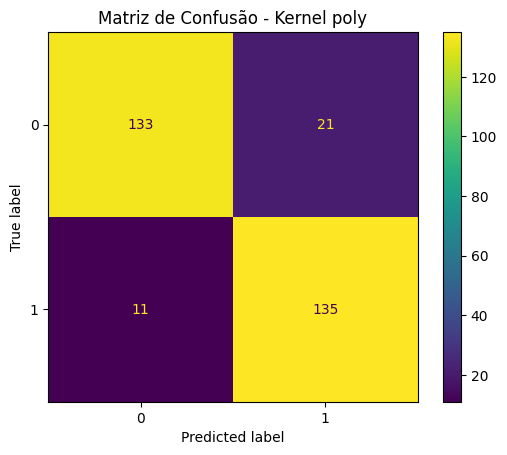


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       154
           1       0.87      0.92      0.89       146

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



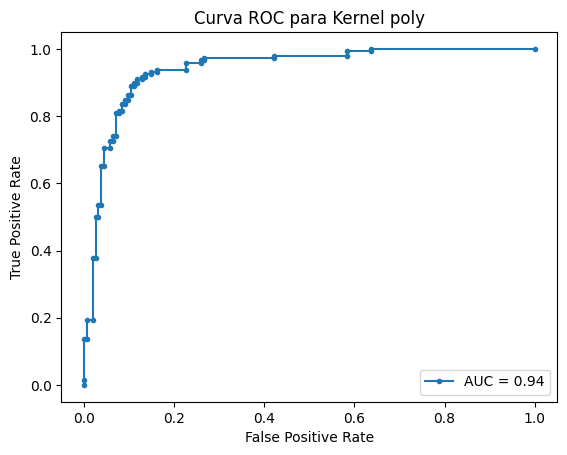

Kernel: rbf
Matriz de Confusão:


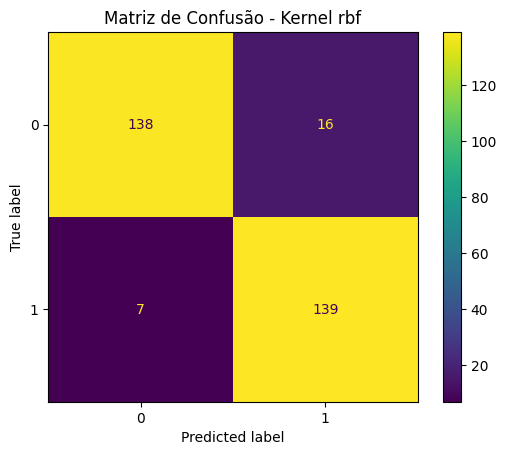


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       154
           1       0.90      0.95      0.92       146

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



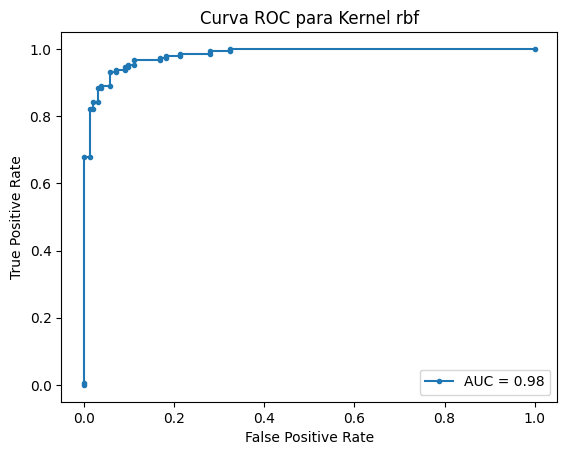

Kernel: sigmoid
Matriz de Confusão:


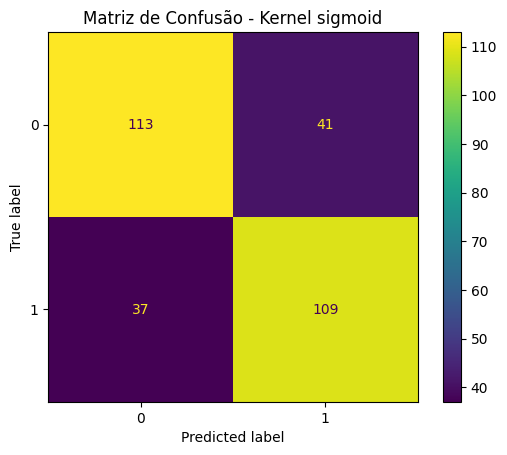


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       154
           1       0.73      0.75      0.74       146

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



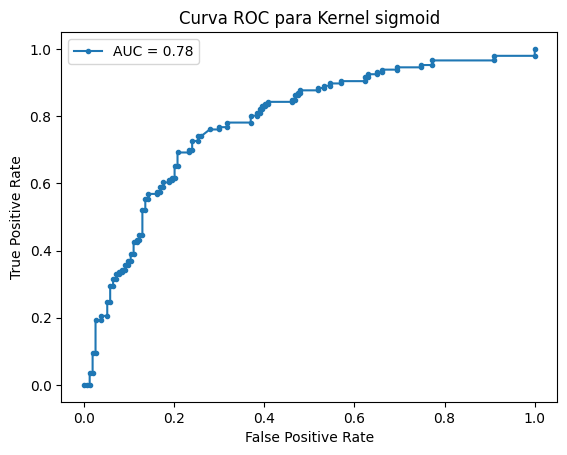

Kernel: linear
Matriz de Confusão:


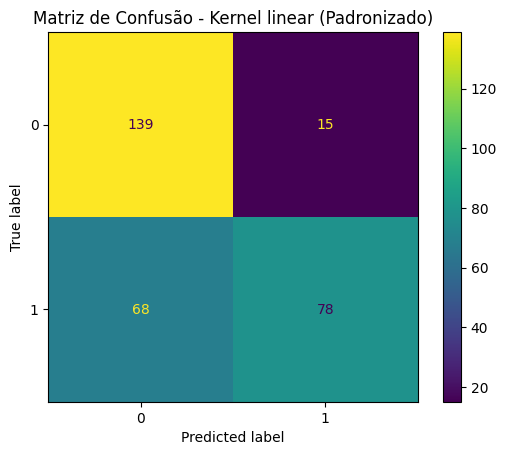


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       154
           1       0.84      0.53      0.65       146

    accuracy                           0.72       300
   macro avg       0.76      0.72      0.71       300
weighted avg       0.75      0.72      0.71       300



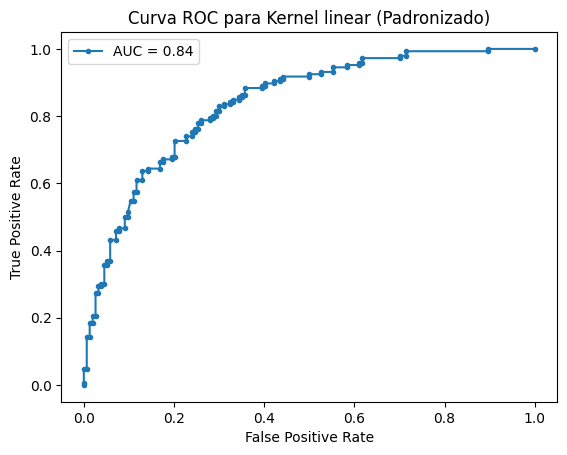

Kernel: poly
Matriz de Confusão:


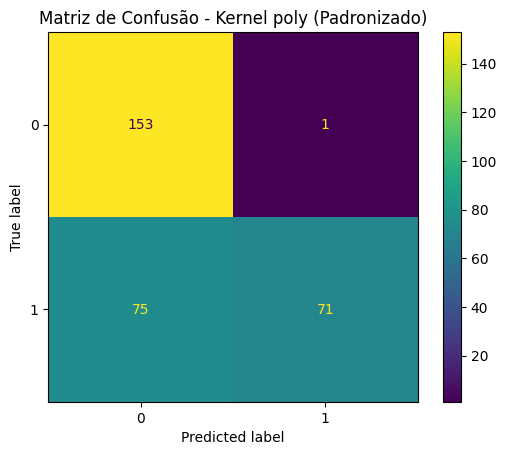


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       154
           1       0.99      0.49      0.65       146

    accuracy                           0.75       300
   macro avg       0.83      0.74      0.73       300
weighted avg       0.82      0.75      0.73       300



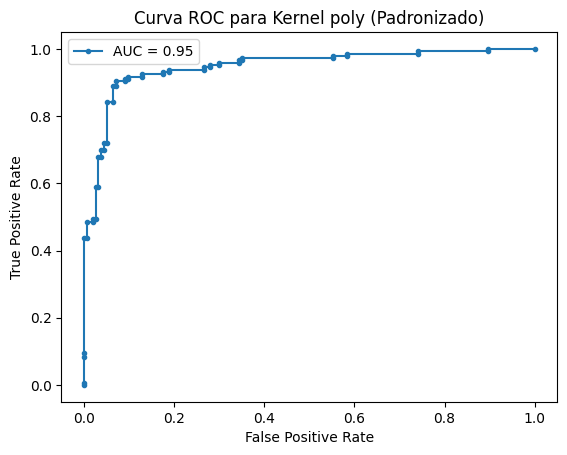

Kernel: rbf
Matriz de Confusão:


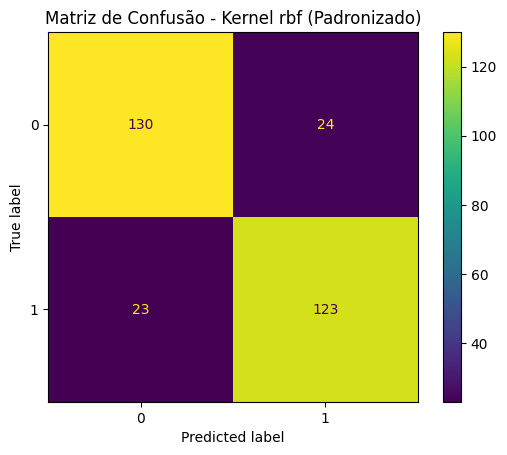


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       154
           1       0.84      0.84      0.84       146

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



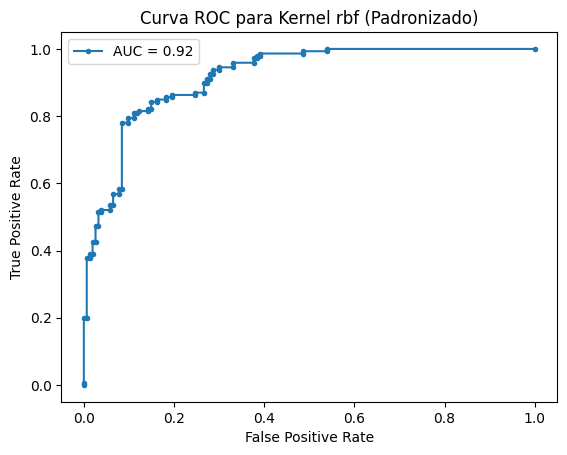

Kernel: sigmoid
Matriz de Confusão:


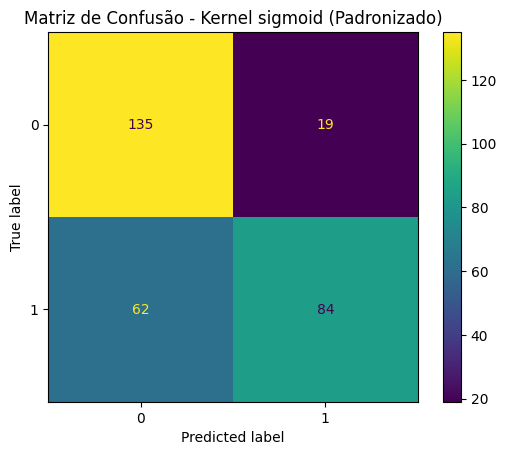


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       154
           1       0.82      0.58      0.67       146

    accuracy                           0.73       300
   macro avg       0.75      0.73      0.72       300
weighted avg       0.75      0.73      0.72       300



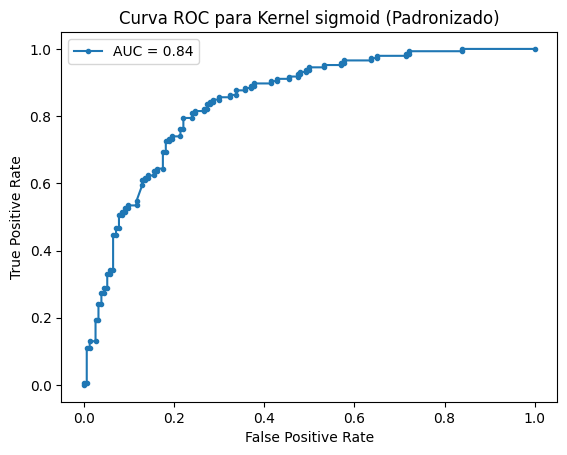

In [25]:
def plot_roc_curve(y_true, y_probs, title):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)
    plt.figure()
    plt.plot(fpr, tpr, marker='.', label=f'AUC = {auc_score:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

# Avaliação das métricas sem padronização
for kernel, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"Kernel: {kernel}")
    print("Matriz de Confusão:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Matriz de Confusão - Kernel {kernel}')
    plt.show()

    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

    # Curva ROC
    plot_roc_curve(y_test, y_prob, f'Curva ROC para Kernel {kernel}')

# Avaliação das métricas com padronização
for kernel, model in models.items():
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    print(f"Kernel: {kernel}")
    print("Matriz de Confusão:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Matriz de Confusão - Kernel {kernel} (Padronizado)')
    plt.show()

    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

    # Curva ROC
    plot_roc_curve(y_test, y_prob, f'Curva ROC para Kernel {kernel} (Padronizado)')


Passo 7: Fronteira de Decisão

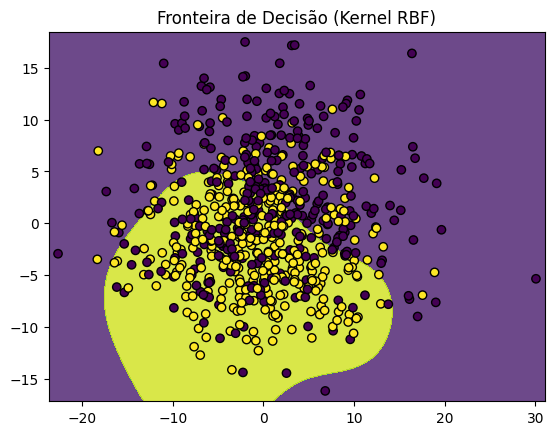

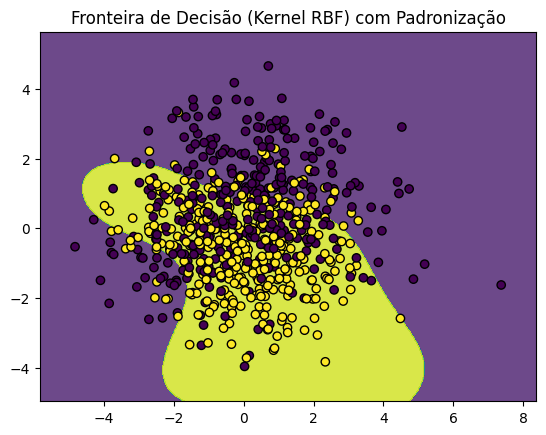

In [26]:
def plot_decision_boundary(X, y, model, title):
    # Reduzindo a dimensionalidade para 2D usando PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    # Ajustando o modelo com os dados reduzidos
    model.fit(X_reduced, y)

    # Criando a malha de pontos para o gráfico
    h = .02  # passo na malha
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotando a fronteira de decisão
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.show()

# Plotando fronteira de decisão para kernel 'rbf' sem padronização
plot_decision_boundary(X_train, y_train, models['rbf'], 'Fronteira de Decisão (Kernel RBF)')

# Plotando fronteira de decisão para kernel 'rbf' com padronização
plot_decision_boundary(X_train_scaled, y_train, models['rbf'], 'Fronteira de Decisão (Kernel RBF) com Padronização')


**Conclusão**

A análise revelou que a padronização dos dados pode melhorar significativamente a performance dos modelos SVM. Sem padronização, as variáveis com escalas diferentes podem influenciar desproporcionalmente o desempenho do modelo, resultando em métricas de avaliação, como a AUC da curva ROC, geralmente inferiores. A padronização equaliza a escala das características, permitindo que o modelo trate cada uma de maneira mais equitativa, o que frequentemente leva a uma melhor generalização e desempenho. Assim, os dados padronizados frequentemente apresentam melhores métricas e uma fronteira de decisão mais robusta, demonstrando a importância de pré-processar os dados para obter resultados mais confiáveis e precisos em tarefas de classificação.